<div class="alert alert-block alert-info">  
    <h2><center>Titanic Survival Prediction</center></h2></div>

<div class="alert alert-block alert-danger">  
<h2>1. Importing the Relevant Libraries</h2></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, \
ElasticNetCV
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, \
RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, \
classification_report, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, \
average_precision_score, precision_recall_curve, SCORERS, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import SCORERS

# Libraries for Style
from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<div class="alert alert-block alert-danger">  
<h2>2. Reading the Data</h2></div>

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df2 = df.iloc[:, [1,2,4,5,6,7,9,10,11]]

In [7]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1,0,7.250,NaN,S
1,1,1,female,38.000,1,0,71.283,C85,C
2,1,3,female,26.000,0,0,7.925,NaN,S
3,1,1,female,35.000,1,0,53.100,C123,S
4,0,3,male,35.000,0,0,8.050,NaN,S


<div class="alert alert-block alert-danger">  
<h2>3. Descriptive Statistics</h2></div>

In [8]:
df2.shape

(891, 9)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [10]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
std,0.487,0.836,14.526,1.103,0.806,49.693
min,0.000,1.000,0.420,0.000,0.000,0.000
25%,0.000,2.000,20.125,0.000,0.000,7.910
50%,0.000,3.000,28.000,0.000,0.000,14.454
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


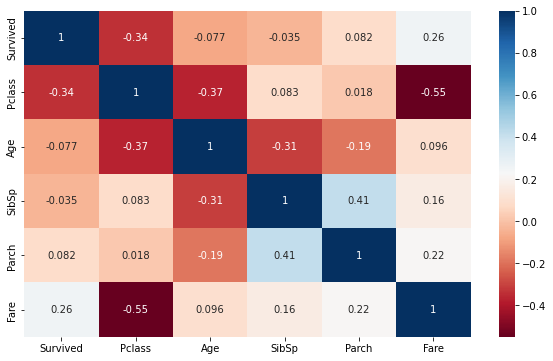

In [12]:
sns.heatmap(df2.corr(), annot=True, cmap='RdBu');

<div class="alert alert-block alert-danger">  
<h2>4. Exploratory Data Analysis</h2></div>

In [13]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1,0,7.250,NaN,S
1,1,1,female,38.000,1,0,71.283,C85,C
2,1,3,female,26.000,0,0,7.925,NaN,S
3,1,1,female,35.000,1,0,53.100,C123,S
4,0,3,male,35.000,0,0,8.050,NaN,S


#### Target Label

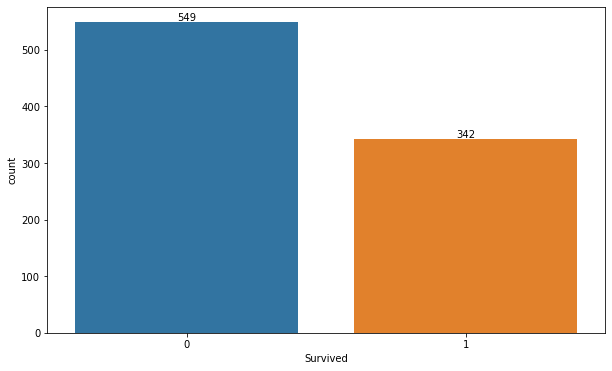

In [14]:
ax = sns.countplot(df2.Survived)
ax.bar_label(ax.containers[0]);

#### Pclass

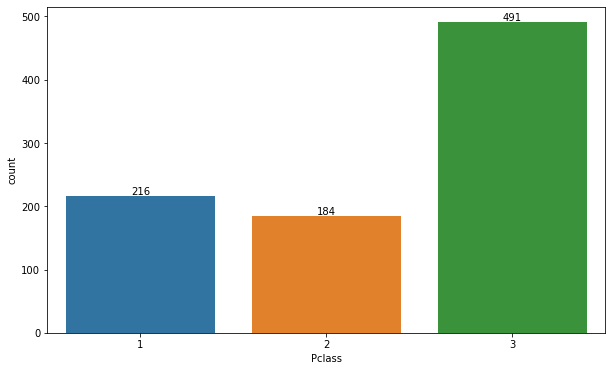

In [15]:
ax = sns.countplot(df2.Pclass)
ax.bar_label(ax.containers[0]);

#### Sex

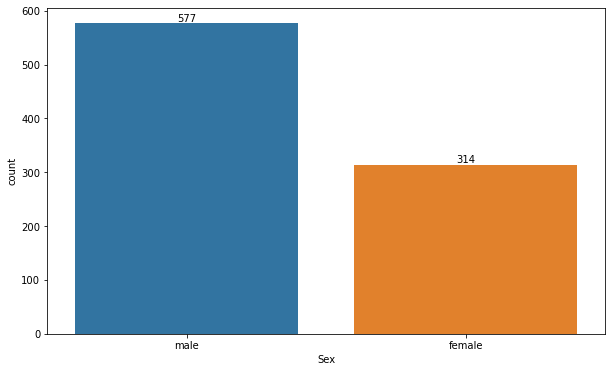

In [16]:
ax = sns.countplot(df2.Sex)
ax.bar_label(ax.containers[0]);

#### Age

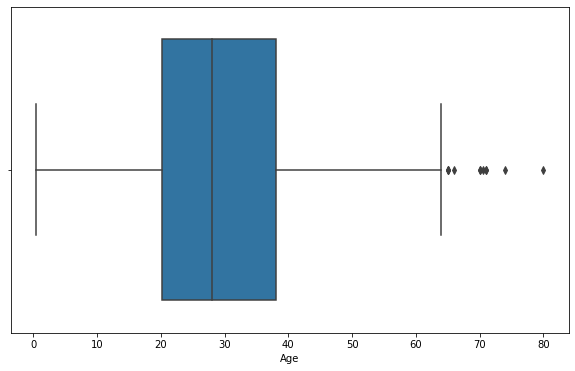

In [17]:
sns.boxplot(df2.Age);

In [18]:
for group1 in list(df2['Sex'].unique()):
    for group2 in list(df2['Pclass'].unique()):
        for group3 in list(df2['SibSp'].unique()):
            for group4 in list(df2['Parch'].unique()):
                cond1 = df2['Sex']==group1
                cond2 = (df2['Sex']==group1) & (df2['Pclass']==group2)
                cond3 = (df2['Sex']==group1) & (df2['Pclass']==group2) & (df2['SibSp']==group3)
                cond4 = (df2['Sex']==group1) & (df2['Pclass']==group2) & (df2['SibSp']==group3) & \
                (df2['Parch']==group4)                                
                mode1 = list(df2[cond1]['Age'].mode())
                mode2 = list(df2[cond2]['Age'].mode())
                mode3 = list(df2[cond3]['Age'].mode())
                mode4 = list(df2[cond4]['Age'].mode())
                if mode4 != []:
                    df2.loc[cond4, 'Age'] = df2.loc[cond4, 'Age'].fillna(df2[cond4]['Age'].mode()[0])
                elif mode3 != []:
                    df2.loc[cond3, 'Age'] = df2.loc[cond3, 'Age'].fillna(df2[cond3]['Age'].mode()[0])
                elif mode2 != []:
                    df2.loc[cond2, 'Age'] = df2.loc[cond2, 'Age'].fillna(df2[cond2]['Age'].mode()[0])

In [19]:
df2.Age.isnull().sum()

0

In [20]:
# Rounding the floating point numbers to the ceiling number.

In [21]:
df2.Age = df2.Age.apply(lambda x: np.ceil(x))

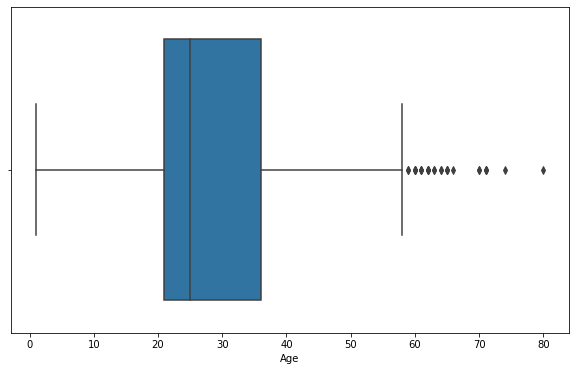

In [22]:
sns.boxplot(df2.Age);

In [23]:
# I keep these outliers

In [24]:
len(df2[df2.Age > 60])

22

#### SibSp

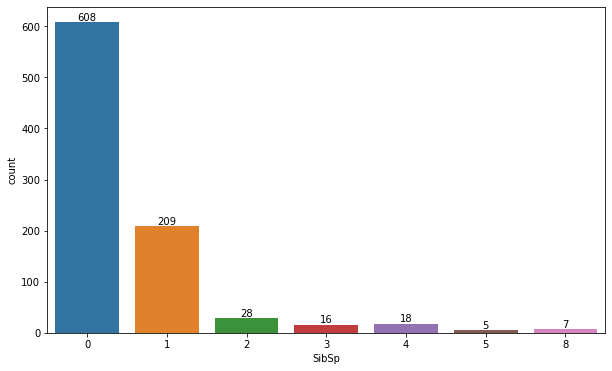

In [25]:
ax = sns.countplot(df2.SibSp)
ax.bar_label(ax.containers[0]);

#### Parch

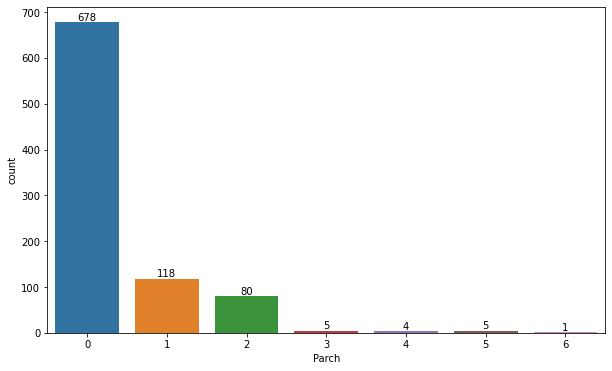

In [26]:
ax = sns.countplot(df2.Parch)
ax.bar_label(ax.containers[0]);

#### Fare

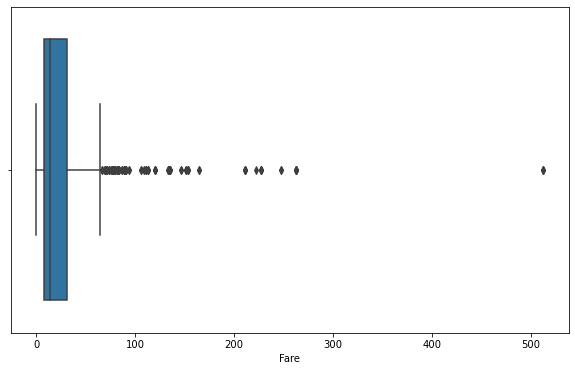

In [27]:
sns.boxplot(df2.Fare);

In [28]:
df2[df2.Fare > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,female,35.000,0,0,512.329,NaN,C
679,1,1,male,36.000,0,1,512.329,B51 B53 B55,C
737,1,1,male,35.000,0,0,512.329,B101,C


In [29]:
# I keep these extreme outliers since these cabins were the most expensive in Titanic

#### Embarked

In [30]:
df2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

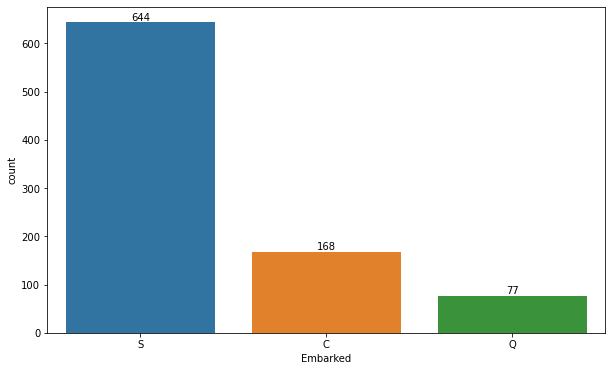

In [31]:
ax = sns.countplot(df2.Embarked)
ax.bar_label(ax.containers[0]);

In [32]:
df2[df2.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.000,0,0,80.000,B28,NaN
829,1,1,female,62.000,0,0,80.000,B28,NaN


In [33]:
df2.loc[61, 'Embarked'] = 'S'

In [34]:
df2.loc[829, 'Embarked'] = 'C'

In [35]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [36]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000,1,0,7.250,NaN,S
1,1,1,female,38.000,1,0,71.283,C85,C
2,1,3,female,26.000,0,0,7.925,NaN,S
3,1,1,female,35.000,1,0,53.100,C123,S
4,0,3,male,35.000,0,0,8.050,NaN,S


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


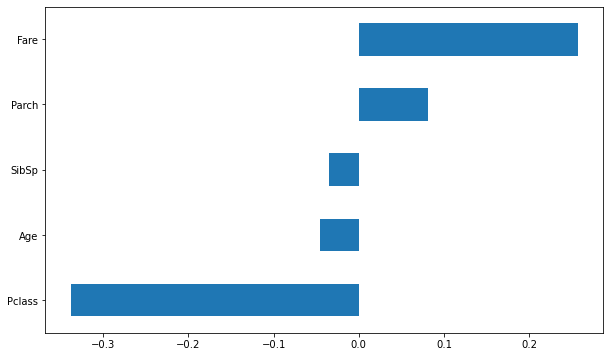

In [38]:
df2.corr()['Survived'].drop('Survived').sort_values().plot.barh();

In [39]:
df2 = df2.drop('Cabin', axis=1)

In [40]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C
2,1,3,female,26.000,0,0,7.925,S
3,1,1,female,35.000,1,0,53.100,S
4,0,3,male,35.000,0,0,8.050,S


In [41]:
df2.shape

(891, 8)

<div class="alert alert-block alert-danger">  
<h2>5. The Training Phase of the ML Procedure</h2></div>

<div class="alert alert-block alert-success">  
<h3>5.1. Data Preprocessing</h3></div>

In [42]:
X = pd.get_dummies(df2.drop('Survived', axis=1), drop_first=True)
y = df2['Survived']

In [43]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000,1,0,7.250,1,0,1
1,1,38.000,1,0,71.283,0,0,0
2,3,26.000,0,0,7.925,0,0,1
3,1,35.000,1,0,53.100,0,0,1
4,3,35.000,0,0,8.050,1,0,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [45]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (712, 8)
Train target shape   :  (712,)
Test features shape  :  (179, 8)
Test target shape    :  (179,)


In [46]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

<div class="alert alert-block alert-success">  
<h3>5.2. Logistic Regression</h3></div>

In [47]:
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42))]
pipe_log_model = Pipeline(steps=operations_log)
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log', LogisticRegression(random_state=42))])

In [48]:
pipe_log_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('log', LogisticRegression(random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'log': LogisticRegression(random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 42,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [49]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[97 13]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[379  60]
 [ 80 193]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       439
           1       0.76      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



#### Cross-Validation

In [50]:
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42))]
pipe_log_model = Pipeline(steps=operations_log)

scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:, 2:].mean()

test_precision   0.757
test_recall      0.703
test_f1          0.724
test_accuracy    0.799
dtype: float64

#### GridSearch

In [51]:
# operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42))]
# pipe_log_model = Pipeline(steps=operations_log)

# penalty = ["l1", "l2"]
# C = np.logspace(-1, 5, 20)
# class_weight= ["balanced", None] 
# solver = ["lbfgs", "liblinear", "sag", "saga"]

# param_grid = {"log__penalty" : penalty,
#               "log__C" : C,
#               "log__class_weight":class_weight,
#               "log__solver":solver}

# grid_model = GridSearchCV(estimator=pipe_log_model,
#                           param_grid=param_grid,
#                           cv=10,
#                           scoring = "accuracy",
#                           n_jobs = -1)

In [52]:
# grid_model.fit(X_train, y_train)

In [53]:
# grid_model.best_params_

In [54]:
# grid_model.best_score_

In [55]:
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,
                                                                        C=16.23776739188721, class_weight=None,
                                                                        penalty='l2', solver='lbfgs'))]
grid_model = Pipeline(steps=operations_log)
grid_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=16.23776739188721, random_state=42))])

In [56]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [21 48]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Train_Set
[[381  58]
 [ 80 193]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.71      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.81      0.80       712



In [57]:
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,
                                                                        C=16.23776739188721, class_weight=None,
                                                                        penalty='l2', solver='lbfgs'))]
pipe_log_model = Pipeline(steps=operations_log)

scores = cross_validate(pipe_log_model, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.760
test_recall      0.710
test_f1          0.730
test_accuracy    0.803
dtype: float64

#### ROC and AUC

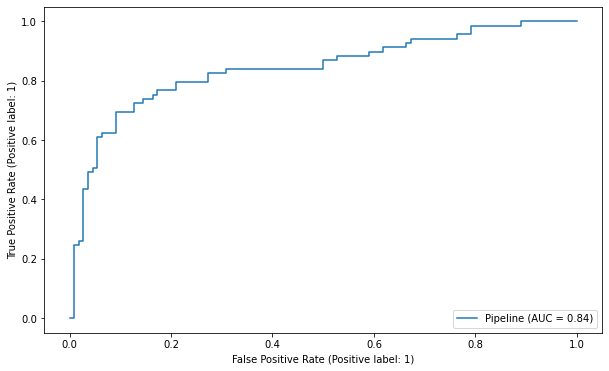

In [58]:
plot_roc_curve(grid_model, X_test, y_test);

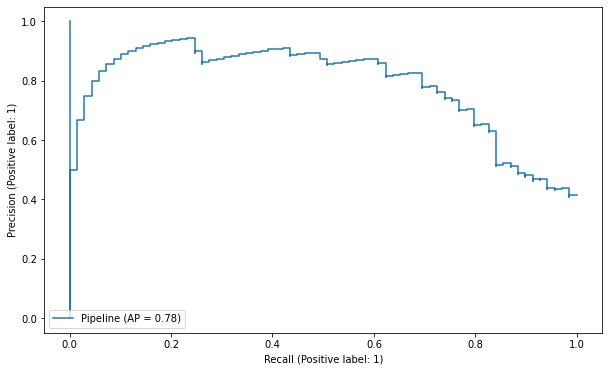

In [59]:
plot_precision_recall_curve(grid_model, X_test, y_test);

In [60]:
y_pred_log = grid_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

<div class="alert alert-block alert-success">  
<h3>5.3. K-Nearest Neighbors</h3></div>

In [61]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]
pipe_knn_model = Pipeline(steps=operations_knn)
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [62]:
pipe_knn_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [63]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[404  35]
 [ 68 205]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       439
           1       0.85      0.75      0.80       273

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.84       712
weighted avg       0.86      0.86      0.85       712



#### Cross Validation

In [64]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]
pipe_knn_model = Pipeline(steps=operations_knn)

scores = cross_validate(pipe_knn_model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:, 2:].mean()

test_precision   0.780
test_recall      0.667
test_f1          0.713
test_accuracy    0.799
dtype: float64

#### Elbow Method for the Optimal K Value

In [65]:
test_error_rates = []

for k in range(1,30):
    
    operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    pipe_knn_model = Pipeline(steps=operations_knn)
    pipe_knn_model.fit(X_train, y_train) 
   
    y_pred = pipe_knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

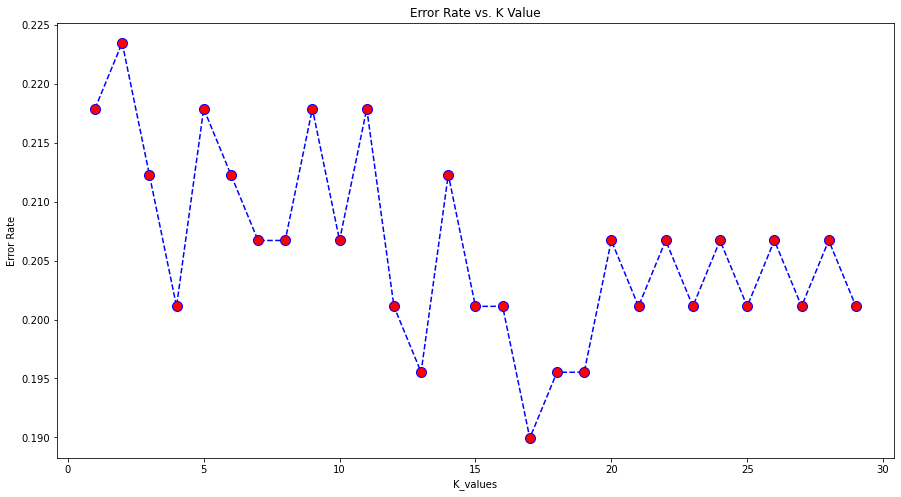

In [66]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [67]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
pipe_knn_model = Pipeline(steps=operations_knn)
pipe_knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [68]:
eval_metric(pipe_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[102   8]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       110
           1       0.84      0.59      0.69        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179


Train_Set
[[418  21]
 [ 83 190]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       439
           1       0.90      0.70      0.79       273

    accuracy                           0.85       712
   macro avg       0.87      0.82      0.84       712
weighted avg       0.86      0.85      0.85       712



#### GridSearch

In [69]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
pipe_knn_model = Pipeline(steps=operations_knn)

param_grid = {'knn__weights': ['uniform', 'distance'], 'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'knn__p': [1, 2]}

knn_grid_model = GridSearchCV(estimator=pipe_knn_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",
                          n_jobs = -1)

In [70]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [71]:
knn_grid_model.best_params_

{'knn__algorithm': 'auto', 'knn__p': 1, 'knn__weights': 'uniform'}

In [72]:
knn_grid_model.best_score_

0.8188380281690142

In [73]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[101   9]
 [ 30  39]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       110
           1       0.81      0.57      0.67        69

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179


Train_Set
[[420  19]
 [ 84 189]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       439
           1       0.91      0.69      0.79       273

    accuracy                           0.86       712
   macro avg       0.87      0.82      0.84       712
weighted avg       0.86      0.86      0.85       712



#### GridSearch-2

In [74]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
pipe_knn_model = Pipeline(steps=operations_knn)

param_grid = {'knn__weights': ['uniform', 'distance'], 'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'knn__p': [1, 2], 'knn__n_neighbors': [4, 5, 13, 17], 'knn__leaf_size':[20, 30]}

knn_grid_model = GridSearchCV(estimator=pipe_knn_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",
                          n_jobs = -1)

In [75]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__leaf_size': [20, 30],
                         'knn__n_neighbors': [4, 5, 13, 17], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [76]:
knn_grid_model.best_params_

{'knn__algorithm': 'auto',
 'knn__leaf_size': 20,
 'knn__n_neighbors': 4,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [77]:
knn_grid_model.best_score_

0.8188380281690142

In [78]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[101   9]
 [ 30  39]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       110
           1       0.81      0.57      0.67        69

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179


Train_Set
[[419  20]
 [ 82 191]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       439
           1       0.91      0.70      0.79       273

    accuracy                           0.86       712
   macro avg       0.87      0.83      0.84       712
weighted avg       0.86      0.86      0.85       712



In [79]:
operations_knn = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=4, algorithm='auto',
                                                                          leaf_size=20, p=1, weights='uniform'))]
pipe_knn_model = Pipeline(steps=operations_knn)

scores = cross_validate(pipe_knn_model, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.866
test_recall      0.626
test_f1          0.718
test_accuracy    0.819
dtype: float64

#### ROC and AUC

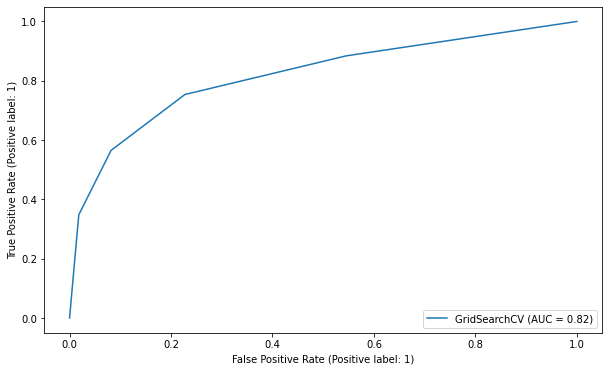

In [80]:
plot_roc_curve(knn_grid_model, X_test, y_test);

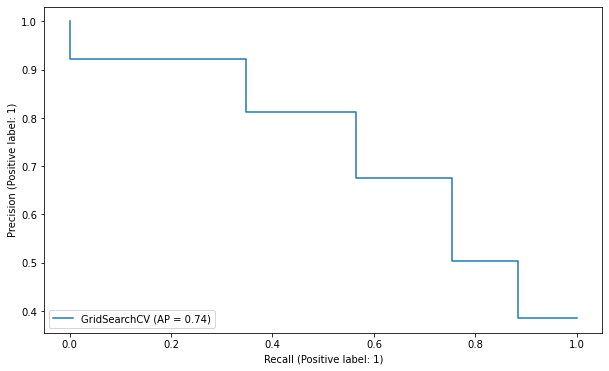

In [81]:
plot_precision_recall_curve(knn_grid_model, X_test, y_test);

In [82]:
y_pred_knn = knn_grid_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

<div class="alert alert-block alert-success">  
<h3>5.4. Support Vector Machines</h3></div>

In [83]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC())]
pipe_svc_model = Pipeline(steps=operations_svc)
pipe_svc_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [84]:
pipe_svc_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('svc', SVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svc': SVC(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [85]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[104   6]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       110
           1       0.86      0.55      0.67        69

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179


Train_Set
[[420  19]
 [111 162]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       439
           1       0.90      0.59      0.71       273

    accuracy                           0.82       712
   macro avg       0.84      0.78      0.79       712
weighted avg       0.83      0.82      0.81       712



#### Cross Validation

In [86]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC())]
pipe_svc_model = Pipeline(steps=operations_svc)

scores = cross_validate(pipe_svc_model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:, 2:].mean()

test_precision   0.901
test_recall      0.593
test_f1          0.699
test_accuracy    0.816
dtype: float64

#### GridSearch

In [87]:
# operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(probability=True))]
# pipe_svc_model = Pipeline(steps=operations_svc)

# param_grid = {'svc__kernel': ['rbf'], 'svc__C': [0.01, 0.1,1,10,100], 'svc__gamma':['auto', 'scale', 1,10, 100]}

# svc_grid_model = GridSearchCV(estimator=pipe_svc_model,
#                           param_grid=param_grid,
#                           cv=5,
#                           scoring = "accuracy",
#                           n_jobs = -1)

In [88]:
# svc_grid_model.fit(X_train, y_train)

In [89]:
# svc_grid_model.best_params_

In [90]:
# svc_grid_model.best_score_

In [91]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(probability=True, kernel='rbf', C=10, gamma='scale'))]
svc_grid_model = Pipeline(steps=operations_svc)
svc_grid_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(C=10, probability=True))])

In [92]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[103   7]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.85       110
           1       0.85      0.59      0.70        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179


Train_Set
[[420  19]
 [ 99 174]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       439
           1       0.90      0.64      0.75       273

    accuracy                           0.83       712
   macro avg       0.86      0.80      0.81       712
weighted avg       0.84      0.83      0.83       712



In [93]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(probability=True, kernel='rbf', C=10, gamma='scale'))]
pipe_svc_model = Pipeline(steps=operations_svc)

scores = cross_validate(pipe_svc_model, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.884
test_recall      0.630
test_f1          0.723
test_accuracy    0.824
dtype: float64

#### ROC and AUC

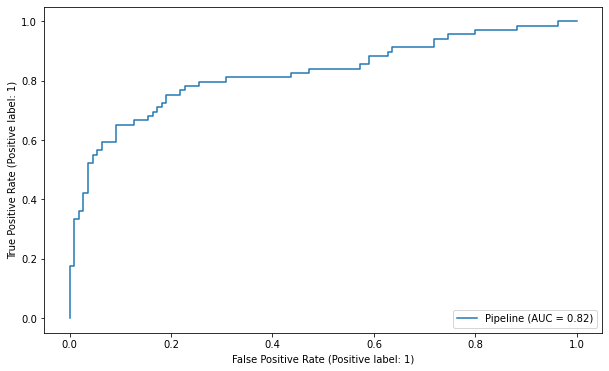

In [94]:
plot_roc_curve(svc_grid_model, X_test, y_test);

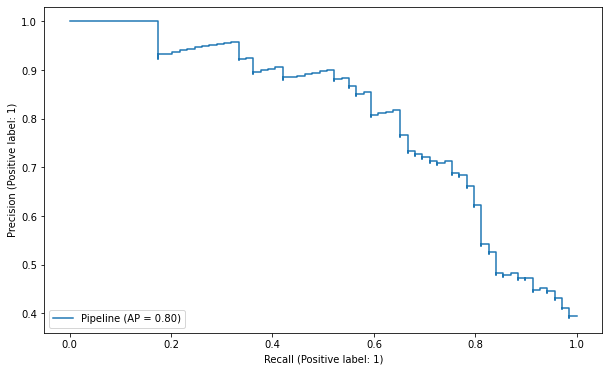

In [95]:
plot_precision_recall_curve(svc_grid_model, X_test, y_test);

In [96]:
y_pred_svc = svc_grid_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

<div class="alert alert-block alert-success">  
<h3>5.5. Decision Tree</h3></div>

In [97]:
X2 = df2.drop('Survived',axis=1)
y2 = df2['Survived']

cat = X2.select_dtypes("object").columns
cat

Index(['Sex', 'Embarked'], dtype='object')

In [98]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.000,22.000,1,0,7.250,2.000
1,1,0.000,38.000,1,0,71.283,0.000
2,3,0.000,26.000,0,0,7.925,2.000
3,1,0.000,35.000,1,0,53.100,2.000
4,3,1.000,35.000,0,0,8.050,2.000


In [99]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [100]:
DT_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
DT_model.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [101]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [102]:
eval_metric(DT_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[81 24]
 [22 52]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.68      0.70      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179


Train_Set
[[434  10]
 [  5 263]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       444
           1       0.96      0.98      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



#### Cross Validation

In [103]:
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.656
test_recall      0.694
test_f1          0.672
test_accuracy    0.746
dtype: float64

#### GridSearch

In [104]:
# model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# param_grid = {"splitter":["best", "random"],
#               "max_depth": [4, 5, 6, 7],
#               "min_samples_leaf": [2, 3, 4, 5],
#               "min_samples_split": [3, 5, 7, 10],
#               "max_features": [2, 3, 4, 5]}

# DT_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10,
#                                  verbose=1, n_jobs=-1).fit(X_train2, y_train2)

In [105]:
# DT_grid_model.best_params_

In [106]:
# DT_grid_model.best_score_

In [107]:
DT_grid_model = DecisionTreeClassifier(random_state=42, max_depth=7, max_features=5, min_samples_leaf=5, 
                                       min_samples_split=3,class_weight='balanced', splitter='random')

DT_grid_model.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_features=5,
                       min_samples_leaf=5, min_samples_split=3, random_state=42,
                       splitter='random')

In [108]:
eval_metric(DT_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[87 18]
 [16 58]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179


Train_Set
[[381  63]
 [ 59 209]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       444
           1       0.77      0.78      0.77       268

    accuracy                           0.83       712
   macro avg       0.82      0.82      0.82       712
weighted avg       0.83      0.83      0.83       712



In [109]:
model = DecisionTreeClassifier(random_state=42, max_depth=4, max_features=5, min_samples_leaf=4, min_samples_split=3,
                              class_weight='balanced', splitter='best')

scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.743
test_recall      0.724
test_f1          0.731
test_accuracy    0.803
dtype: float64

#### ROC and AUC

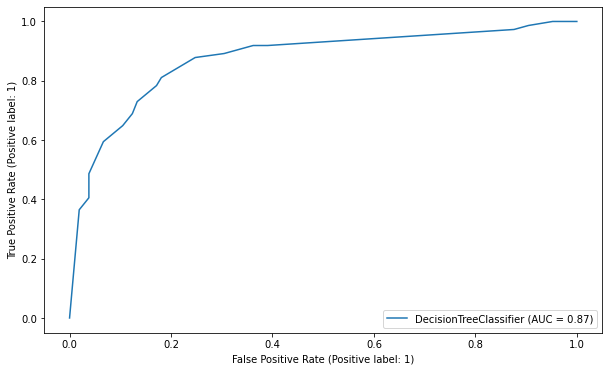

In [110]:
plot_roc_curve(DT_grid_model, X_test2, y_test2)

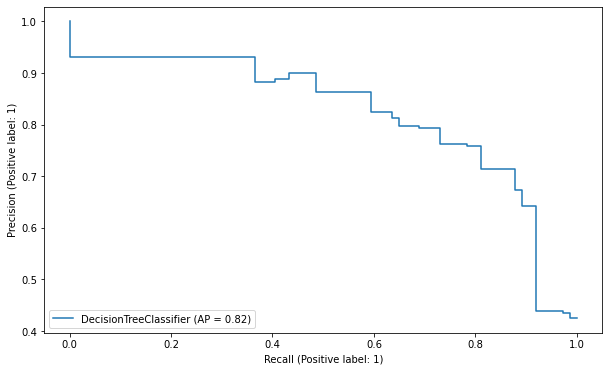

In [111]:
plot_precision_recall_curve(DT_grid_model, X_test2, y_test2);

In [112]:
y_pred_dt = DT_grid_model.predict(X_test2)
accuracy_dt = accuracy_score(y_test2, y_pred_dt)
recall_dt = recall_score(y_test2, y_pred_dt)
precision_dt = precision_score(y_test2, y_pred_dt)
f1_dt = f1_score(y_test2, y_pred_dt)

<div class="alert alert-block alert-success">  
<h3>5.6. Random Forest</h3></div>

In [113]:
RF_model = RandomForestClassifier(random_state=42, class_weight='balanced')
RF_model.fit(X_train2,y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [114]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [115]:
eval_metric(RF_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[89 16]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[438   6]
 [  9 259]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.98      0.97      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



#### Cross Validation

In [116]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.745
test_recall      0.702
test_f1          0.721
test_accuracy    0.796
dtype: float64

#### GridSearch

In [117]:
# model = RandomForestClassifier(random_state=42, class_weight='balanced')

# param_grid = {"n_estimators":[50, 64, 100, 128, 200],
#               "max_depth": [5, 6, 8, 10],
#               "min_samples_leaf": [1, 2, 3],
#               "min_samples_split": [2, 5, 8],
#               "max_features":['auto', 3, 4, 6, 8, 10]}

# RF_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5,
#                              verbose=1, n_jobs = -1).fit(X_train2,y_train2)

In [118]:
# RF_grid_model.best_params_

In [119]:
# RF_grid_model.best_score_

In [120]:
RF_grid_model = RandomForestClassifier(random_state=42, max_depth=8, max_features=6, min_samples_leaf=1, 
                                       min_samples_split=2,n_estimators=128, class_weight='balanced')

RF_grid_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       n_estimators=128, random_state=42)

In [121]:
eval_metric(RF_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[91 14]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[437   7]
 [ 39 229]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       444
           1       0.97      0.85      0.91       268

    accuracy                           0.94       712
   macro avg       0.94      0.92      0.93       712
weighted avg       0.94      0.94      0.93       712



In [122]:
model = RandomForestClassifier(random_state=42, max_depth=8, max_features=6, min_samples_leaf=1, min_samples_split=2,
                              n_estimators=128, class_weight='balanced')


scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.779
test_recall      0.668
test_f1          0.718
test_accuracy    0.805
dtype: float64

#### ROC and AUC

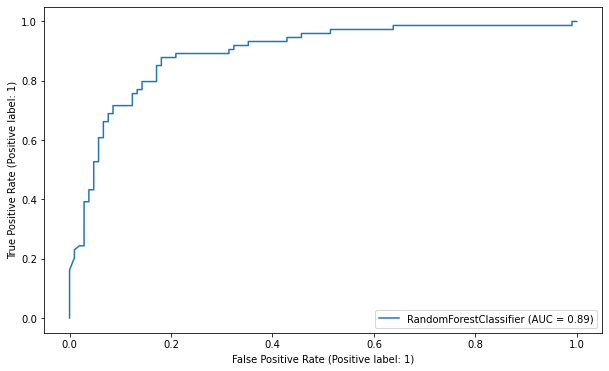

In [123]:
plot_roc_curve(RF_grid_model, X_test2, y_test2)

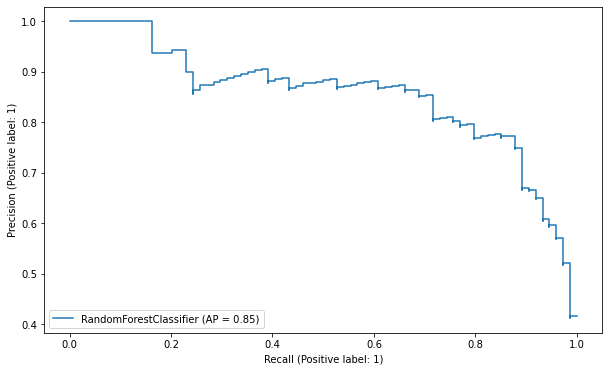

In [124]:
plot_precision_recall_curve(RF_grid_model, X_test2, y_test2);

In [125]:
y_pred_rf = RF_grid_model.predict(X_test2)
accuracy_rf = accuracy_score(y_test2, y_pred_rf)
recall_rf = recall_score(y_test2, y_pred_rf)
precision_rf = precision_score(y_test2, y_pred_rf)
f1_rf = f1_score(y_test2, y_pred_rf)

<div class="alert alert-block alert-success">  
<h3>5.7. AdaBoost (Adaptive Boosting)</h3></div>

In [126]:
ADA_model = AdaBoostClassifier(random_state=42)
ADA_model.fit(X_train2, y_train2)

AdaBoostClassifier(random_state=42)

In [127]:
ADA_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [128]:
eval_metric(ADA_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[87 18]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[393  51]
 [ 70 198]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       444
           1       0.80      0.74      0.77       268

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712



#### Cross Validation

In [129]:
model = AdaBoostClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.734
test_recall      0.705
test_f1          0.717
test_accuracy    0.791
dtype: float64

#### GridSearch

In [130]:
model = AdaBoostClassifier(random_state=42)

param_grid = {"n_estimators": [55, 64, 100, 200],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1]}

ADA_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5,
                             verbose=1, n_jobs = -1).fit(X_train2,y_train2)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [131]:
ADA_grid_model.best_params_

{'learning_rate': 0.9, 'n_estimators': 55}

In [132]:
ADA_grid_model.best_score_

0.8005121638924455

In [133]:
eval_metric(ADA_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[87 18]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Train_Set
[[388  56]
 [ 68 200]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       444
           1       0.78      0.75      0.76       268

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.83      0.83       712



In [134]:
model = AdaBoostClassifier(learning_rate=0.9, n_estimators=55, random_state=42)


scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.747
test_recall      0.709
test_f1          0.726
test_accuracy    0.799
dtype: float64

#### ROC and AUC

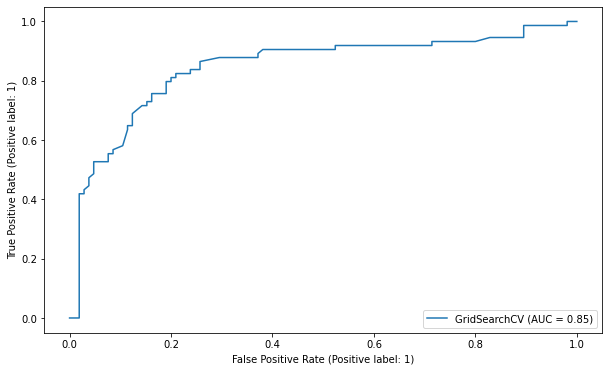

In [135]:
plot_roc_curve(ADA_grid_model, X_test2, y_test2)

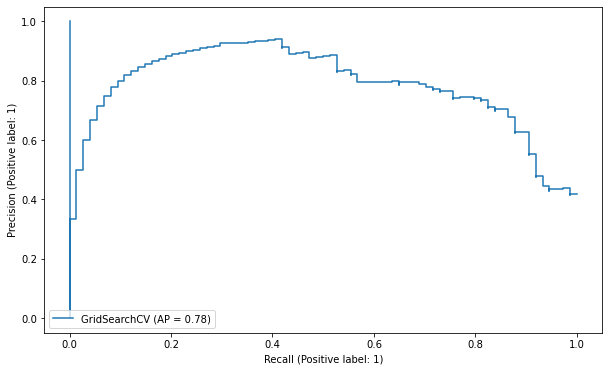

In [136]:
plot_precision_recall_curve(ADA_grid_model, X_test2, y_test2);

In [137]:
y_pred_ada = ADA_grid_model.predict(X_test2)
accuracy_ada = accuracy_score(y_test2, y_pred_ada)
recall_ada = recall_score(y_test2, y_pred_ada)
precision_ada = precision_score(y_test2, y_pred_ada)
f1_ada = f1_score(y_test2, y_pred_ada)

<div class="alert alert-block alert-success">  
<h3>5.8. Extreme Gradient Boosting (XGBoost)</h3></div>

In [138]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train2, y_train2)

[10:55:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [140]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[90 15]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


Train_Set
[[438   6]
 [ 21 247]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       444
           1       0.98      0.92      0.95       268

    accuracy                           0.96       712
   macro avg       0.97      0.95      0.96       712
weighted avg       0.96      0.96      0.96       712



#### Cross Validation

In [141]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

[10:55:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

test_precision   0.726
test_recall      0.687
test_f1          0.704
test_accuracy    0.785
dtype: float64

#### GridSearch

In [142]:
# model = XGBClassifier(random_state=42)

# param_grid = {"n_estimators":[50, 64, 100, 128, 200], "subsample":[0.5, 0.8, 1], "max_features" : [None, 3, 4],
#               "learning_rate": [0.05, 0.1, 0.2], 'max_depth':[2, 3, 4, 5], "colsample_bytree":[0.5, 0.7, 1, 2, 3]}

# xgboost_grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5,
#                              verbose=1, n_jobs = -1).fit(X_train2,y_train2)

In [143]:
# xgboost_grid_model.best_params_

In [144]:
# xgboost_grid_model.best_score_

In [145]:
xgboost_grid_model = XGBClassifier(colsample_bytree=1, learning_rate=0.2, max_depth=3, max_features=None,
                      n_estimators=50, subsample=1, random_state=42)

xgboost_grid_model.fit(X_train2, y_train2)

[10:55:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, max_features=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
eval_metric(xgboost_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[429  15]
 [ 58 210]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       444
           1       0.93      0.78      0.85       268

    accuracy                           0.90       712
   macro avg       0.91      0.87      0.89       712
weighted avg       0.90      0.90      0.90       712



In [147]:
# model = XGBClassifier(colsample_bytree=1, learning_rate=0.2, max_depth=3, max_features=None,
#                       n_estimators=50, subsample=1, random_state=42)


# scores = cross_validate(model, X_train2, y_train2, scoring=['precision','recall','f1','accuracy'], cv=10)
# scores = pd.DataFrame(scores, index=range(1,11))
# scores.iloc[:, 2:].mean()

#### ROC and AUC

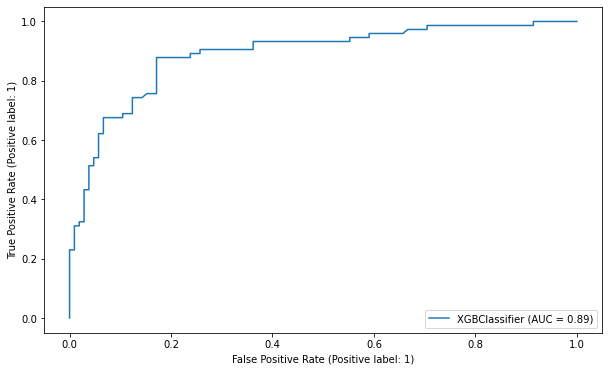

In [148]:
plot_roc_curve(xgboost_grid_model, X_test2, y_test2)

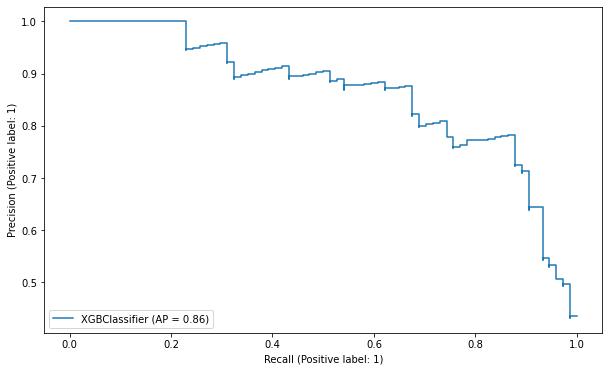

In [149]:
plot_precision_recall_curve(xgboost_grid_model, X_test2, y_test2);

In [150]:
y_pred_xgb = xgboost_grid_model.predict(X_test2)
accuracy_xgb = accuracy_score(y_test2, y_pred_xgb)
recall_xgb = recall_score(y_test2, y_pred_xgb)
precision_xgb = precision_score(y_test2, y_pred_xgb)
f1_xgb = f1_score(y_test2, y_pred_xgb)

<div class="alert alert-block alert-danger">  
<h2>6. Comparing the Models</h2></div>

In [151]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVR", "Decision Tree", 
                                  "Random Forest", "AdaBoost", "XGBoost"],
                    "Accuracy": [accuracy_log, accuracy_knn, accuracy_svc, accuracy_dt, accuracy_rf, accuracy_ada,
                                accuracy_xgb],
                    "Recall": [recall_log, recall_knn, recall_svc, recall_dt, recall_rf, recall_ada, recall_xgb],
                    "Precision": [precision_log, precision_knn, precision_svc, precision_dt, precision_rf,
                                 precision_ada, precision_xgb],
                    "F1-Score": [f1_log, f1_knn, f1_svc, f1_dt, f1_rf, f1_ada, f1_xgb]})

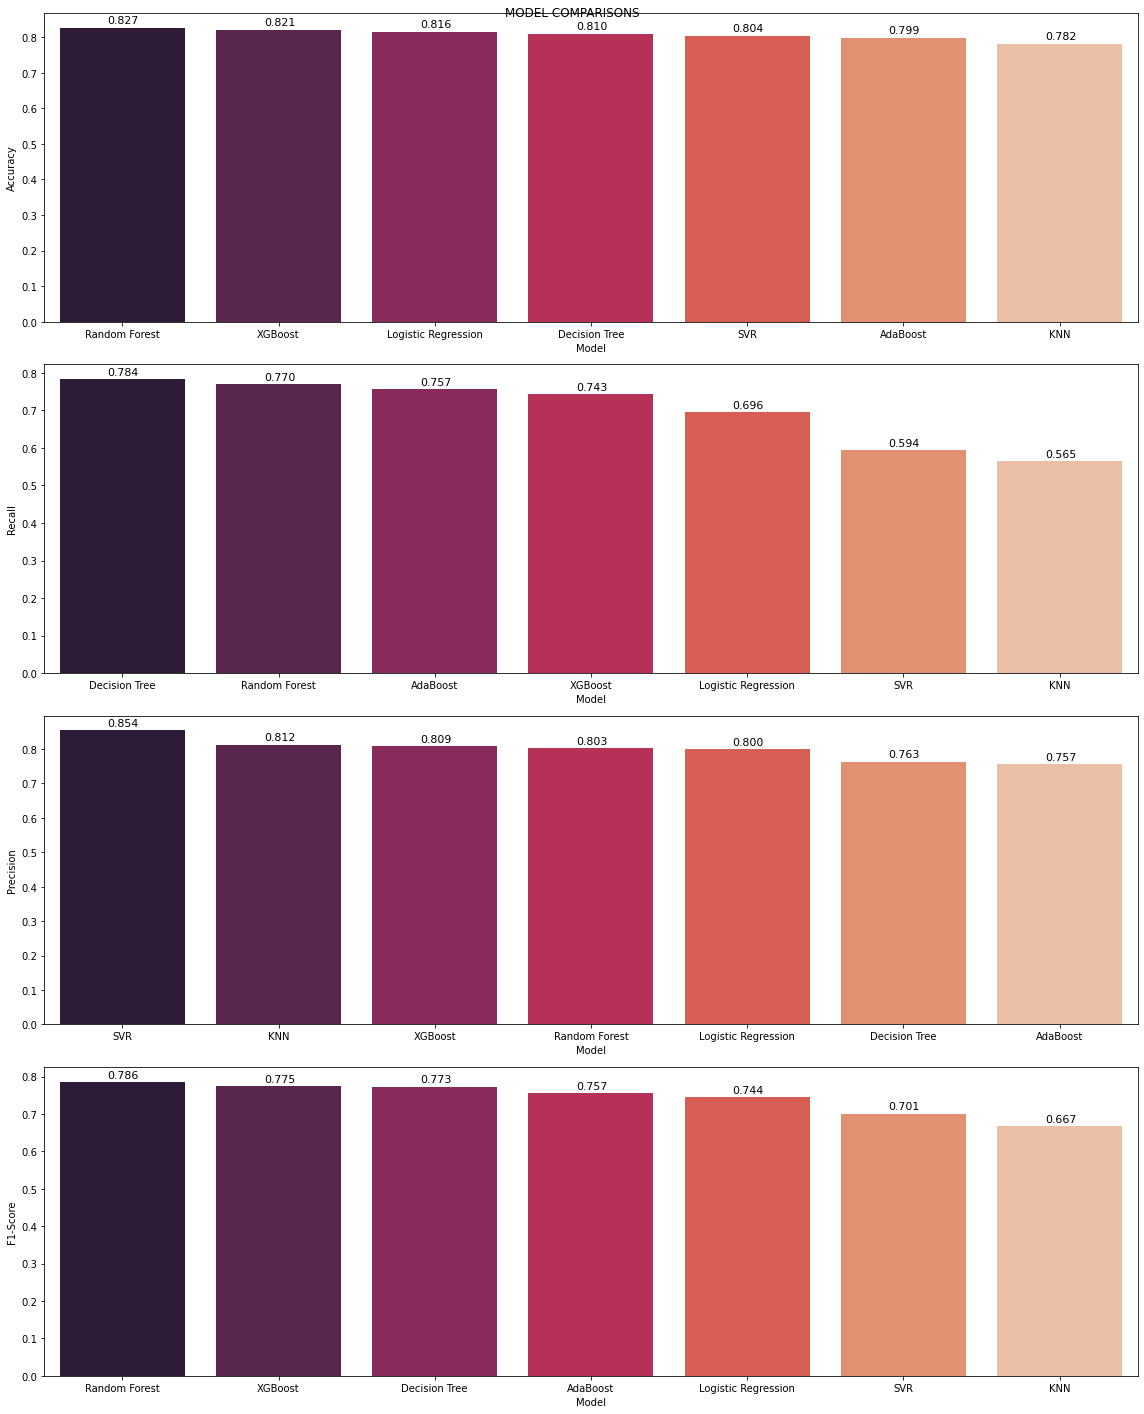

In [152]:
fig, ax = plt.subplots(4,1, figsize=(16,20))

def labels(ax, i):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=11)
                
sns.barplot(x='Model', y='Accuracy', data=compare.sort_values('Accuracy', ascending=False), palette='rocket', ax = ax[0]), labels(ax,0)
sns.barplot(x='Model', y='Recall', data=compare.sort_values('Recall', ascending=False), palette='rocket', ax = ax[1]), labels(ax,1)
sns.barplot(x='Model', y='Precision', data=compare.sort_values('Precision', ascending=False), palette='rocket', ax = ax[2]), labels(ax,2)
sns.barplot(x='Model', y='F1-Score', data=compare.sort_values('F1-Score', ascending=False), palette='rocket', ax = ax[3]), labels(ax,3)

fig.suptitle('MODEL COMPARISONS')
fig.tight_layout(); 

<div class="alert alert-block alert-danger">  
<h2>7. Final Models</h2></div>

In [153]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [154]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [155]:
test_data.shape

(418, 11)

In [156]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [157]:
for group1 in list(test_data['Sex'].unique()):
    for group2 in list(test_data['Pclass'].unique()):
        for group3 in list(test_data['SibSp'].unique()):
            for group4 in list(test_data['Parch'].unique()):
                cond1 = test_data['Sex']==group1
                cond2 = (test_data['Sex']==group1) & (test_data['Pclass']==group2)
                cond3 = (test_data['Sex']==group1) & (test_data['Pclass']==group2) & (test_data['SibSp']==group3)
                cond4 = (test_data['Sex']==group1) & (test_data['Pclass']==group2) & (test_data['SibSp']==group3) & \
                (test_data['Parch']==group4)                                
                mode1 = list(test_data[cond1]['Age'].mode())
                mode2 = list(test_data[cond2]['Age'].mode())
                mode3 = list(test_data[cond3]['Age'].mode())
                mode4 = list(test_data[cond4]['Age'].mode())
                if mode4 != []:
                    test_data.loc[cond4, 'Age'] = test_data.loc[cond4, 'Age'].fillna(test_data[cond4]['Age'].mode()[0])
                elif mode3 != []:
                    test_data.loc[cond3, 'Age'] = test_data.loc[cond3, 'Age'].fillna(test_data[cond3]['Age'].mode()[0])
                elif mode2 != []:
                    test_data.loc[cond2, 'Age'] = test_data.loc[cond2, 'Age'].fillna(test_data[cond2]['Age'].mode()[0])

In [158]:
test_data.Age = test_data.Age.apply(lambda x: np.ceil(x))

In [159]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [160]:
test_data[test_data.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,61.000,0,0,3701,NaN,NaN,S


In [161]:
test_data.Fare.fillna(method='ffill', inplace=True)

In [162]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [163]:
test2 = test_data.iloc[:,[1, 3, 4, 5, 6, 8, 10]]

In [164]:
test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,35.000,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q
3,3,male,27.000,0,0,8.662,S
4,3,female,22.000,1,1,12.287,S


In [165]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [166]:
X_dummed = pd.get_dummies(test2, drop_first=True)

In [167]:
X_dummed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,35.000,0,0,7.829,1,1,0
1,3,47.000,1,0,7.000,0,0,1
2,2,62.000,0,0,9.688,1,1,0
3,3,27.000,0,0,8.662,1,0,1
4,3,22.000,1,1,12.287,0,0,1


In [168]:
cat_final = test2.select_dtypes("object").columns
cat_final

Index(['Sex', 'Embarked'], dtype='object')

In [169]:
X_enc = test2
enc = OrdinalEncoder()
X_enc[cat_final] = enc.fit_transform(X_enc[cat_final])
X_enc.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.000,35.000,0,0,7.829,1.000
1,3,0.000,47.000,1,0,7.000,2.000
2,2,1.000,62.000,0,0,9.688,1.000
3,3,1.000,27.000,0,0,8.662,2.000
4,3,0.000,22.000,1,1,12.287,2.000


In [170]:
operations_log = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,
                                                                        C=16.23776739188721, class_weight=None,
                                                                        penalty='l2', solver='lbfgs'))]
final_log_model = Pipeline(steps=operations_log)

In [171]:
final_log_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=16.23776739188721, random_state=42))])

In [172]:
final_pred_log = final_log_model.predict(X_dummed)

In [173]:
final_rf_model = RandomForestClassifier(random_state=42, max_depth=8, max_features=6, min_samples_leaf=1, 
                                        min_samples_split=2, n_estimators=128, class_weight='balanced')

In [174]:
final_rf_model.fit(X2, y2)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       n_estimators=128, random_state=42)

In [175]:
final_pred_rf = final_rf_model.predict(X_enc)

In [176]:
final_xgb_model = XGBClassifier(colsample_bytree=1, learning_rate=0.2, max_depth=3, max_features=None,
                      n_estimators=50, subsample=1, random_state=42)

In [177]:
final_xgb_model.fit(X2, y2)

[10:55:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, max_features=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
final_pred_xgb = final_xgb_model.predict(X_enc)

In [179]:
log_df = pd.DataFrame(final_pred_log, columns=['Logistic Regression'])

In [180]:
rf_df = pd.DataFrame(final_pred_rf, columns=['Random Forest'])

In [181]:
xgb_df = pd.DataFrame(final_pred_xgb, columns=['XGBoost'])

In [182]:
res = pd.concat([log_df, rf_df, xgb_df], axis=1)

In [183]:
res['Logistic Regression'].value_counts()

0    262
1    156
Name: Logistic Regression, dtype: int64

In [184]:
res['Random Forest'].value_counts()

0    270
1    148
Name: Random Forest, dtype: int64

In [185]:
res['XGBoost'].value_counts()

0    273
1    145
Name: XGBoost, dtype: int64

In [186]:
pd.crosstab(res['XGBoost'], res['Random Forest'])

Random Forest,0,1
XGBoost,,
0,255,18
1,15,130


In [187]:
pd.crosstab(res['XGBoost'], res['Logistic Regression'])

Logistic Regression,0,1
XGBoost,,
0,248,25
1,14,131


In [188]:
pd.crosstab(res['Logistic Regression'], res['Random Forest'])

Random Forest,0,1
Logistic Regression,,
0,235,27
1,35,121


In [189]:
submission = pd.DataFrame(final_pred_xgb, columns=['Survived'])

In [190]:
submit = pd.concat([test_data['PassengerId'], submission], axis=1)

In [191]:
# submit

In [192]:
# submit.to_csv('submission.csv', index=False)

<div class="alert alert-block alert-danger">  
<h2>8. SMOTE Application to the Data</h2></div>

In [193]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [194]:
y2.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [195]:
over = SMOTE(sampling_strategy={1:444})

In [196]:
X_re, y_re = over.fit_resample(X_train2, y_train2)

In [197]:
y_train2.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [198]:
y_re.value_counts()

0    444
1    444
Name: Survived, dtype: int64

### Random Forest Classifier

In [199]:
# model = RandomForestClassifier(random_state=42, class_weight='balanced')

# param_grid = {"n_estimators":[64, 100, 128, 200],
#               "max_depth": [None, 6, 8, 10, 15],
#               "min_samples_leaf": [1, 2, 3],
#               "min_samples_split": [2, 5, 8],
#               "max_features":['auto', 3, 4, 6, 8, 10]}

# rf_model_re = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5,
#                              verbose=1, n_jobs = -1)

In [200]:
# rf_model_re.fit(X_re, y_re)

In [201]:
# rf_model_re.best_params_

In [202]:
# rf_model_re.best_score_

In [203]:
rf_model_re = RandomForestClassifier(random_state=42, max_depth=10, max_features=4, min_samples_leaf=1, 
                                     min_samples_split=5, n_estimators=64, class_weight='balanced')

In [204]:
rf_model_re.fit(X_re, y_re)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=4,
                       min_samples_split=5, n_estimators=64, random_state=42)

In [205]:
eval_metric(rf_model_re, X_re, y_re, X_test2, y_test2)

Test_Set
[[92 13]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[431  13]
 [ 44 400]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       444
           1       0.97      0.90      0.93       444

    accuracy                           0.94       888
   macro avg       0.94      0.94      0.94       888
weighted avg       0.94      0.94      0.94       888



In [206]:
model = RandomForestClassifier(random_state=42, max_depth=10, max_features=4, min_samples_leaf=1, 
                                     min_samples_split=5, n_estimators=64, class_weight='balanced')

scores = cross_validate(model, X_re, y_re, scoring=['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.875
test_recall      0.813
test_f1          0.839
test_accuracy    0.848
dtype: float64

In [207]:
y_pred_rf_re = rf_model_re.predict(X_test2)
accuracy_rf_re = accuracy_score(y_test2, y_pred_rf_re)
recall_rf_re = recall_score(y_test2, y_pred_rf_re)
precision_rf_re = precision_score(y_test2, y_pred_rf_re)
f1_rf_re = f1_score(y_test2, y_pred_rf_re)

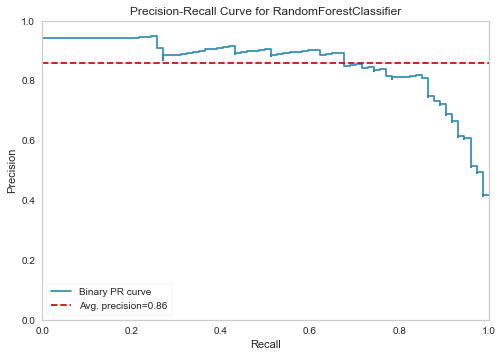

In [208]:
from yellowbrick.classifier import PrecisionRecallCurve

model = RandomForestClassifier(random_state=42, max_depth=10, max_features=4, min_samples_leaf=1, 
                                     min_samples_split=5, n_estimators=64, class_weight='balanced')

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_re, y_re)
viz.score(X_test2, y_test2)
viz.show();

### XGBoost Classifier

In [209]:
# model = XGBClassifier(random_state=42)

# param_grid = {"n_estimators":[50, 64, 100, 128, 200], "subsample":[0.5, 0.8, 1], "max_features" : [None, 3, 4],
#               "learning_rate": [0.05, 0.1, 0.2], 'max_depth':[2, 3, 4, 5], "colsample_bytree":[0.5, 0.7, 1, 2, 3]}

# xgboost_model_re = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5,
#                              verbose=1, n_jobs = -1)

In [210]:
# xgboost_model_re.fit(X_re, y_re)

In [211]:
# xgboost_model_re.best_params_

In [212]:
# xgboost_model_re.best_score_

In [213]:
xgboost_model_re = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=4, max_features=None,
                      n_estimators=200, subsample=0.8, random_state=42)

In [214]:
xgboost_model_re.fit(X_re, y_re)

[10:55:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              max_features=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [215]:
eval_metric(xgboost_model_re, X_re, y_re, X_test2, y_test2)

Test_Set
[[90 15]
 [14 60]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[430  14]
 [ 39 405]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       444
           1       0.97      0.91      0.94       444

    accuracy                           0.94       888
   macro avg       0.94      0.94      0.94       888
weighted avg       0.94      0.94      0.94       888



In [216]:
model = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=4, max_features=None,
                      n_estimators=200, subsample=0.8, random_state=42)

scores = cross_validate(model, X_re, y_re, scoring=['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[10:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:55:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

test_precision   0.876
test_recall      0.815
test_f1          0.840
test_accuracy    0.849
dtype: float64

In [217]:
y_pred_xgb_re = xgboost_model_re.predict(X_test2)
accuracy_xgb_re = accuracy_score(y_test2, y_pred_xgb_re)
recall_xgb_re = recall_score(y_test2, y_pred_xgb_re)
precision_xgb_re = precision_score(y_test2, y_pred_xgb_re)
f1_xgb_re = f1_score(y_test2, y_pred_xgb_re)

[10:55:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


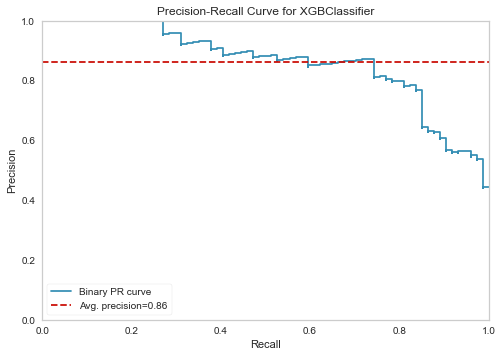

In [218]:
model = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=4, max_features=None,
                      n_estimators=200, subsample=0.8, random_state=42)

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_re, y_re)
viz.score(X_test2, y_test2)
viz.show();

### Logistic Regression

In [254]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [255]:
over = SMOTE(sampling_strategy={1:439})

In [241]:
operations = [('o', over), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(random_state=42))]

smote_pipeline_log = imbpipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"log__penalty" : penalty,
              "log__C" : C,
              "log__class_weight":class_weight,
              "log__solver":solver}

log_model_smote = GridSearchCV(estimator=smote_pipeline_log,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",
                          n_jobs = -1)

In [248]:
# log_model_smote.fit(X_train, y_train)

In [247]:
# log_model_smote.best_params_

In [246]:
# log_model_smote.best_score_

In [264]:
operations_log = [('o', over),("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,
                                                                        C=23357.21469090121, class_weight='balanced',
                                                                        penalty='l2', solver='liblinear'))]
log_model_smote = imbpipeline(steps=operations_log)
log_model_smote.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 439})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(C=23357.21469090121,
                                    class_weight='balanced', random_state=42,
                                    solver='liblinear'))])

In [265]:
eval_metric(log_model_smote, X_train, y_train, X_test, y_test)

Test_Set
[[97 13]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[368  71]
 [ 77 196]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       439
           1       0.73      0.72      0.73       273

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



In [266]:
operations_log = [('o', over),("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,
                                                                        C=23357.21469090121, class_weight='balanced',
                                                                        penalty='l2', solver='liblinear'))]
pipe_log_model = imbpipeline(steps=operations_log)

scores = cross_validate(pipe_log_model, X_train, y_train, scoring=['precision','recall','f1','accuracy'], cv=10)
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_precision   0.739
test_recall      0.722
test_f1          0.727
test_accuracy    0.795
dtype: float64

In [267]:
y_pred_log_re = log_model_smote.predict(X_test)
accuracy_log_re = accuracy_score(y_test, y_pred_log_re)
recall_log_re = recall_score(y_test, y_pred_log_re)
precision_log_re = precision_score(y_test, y_pred_log_re)
f1_log_re = f1_score(y_test, y_pred_log_re)

### New Comparison

In [269]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVR", "Decision Tree", 
                                  "Random Forest", "AdaBoost", "XGBoost", "Random Forest SMOTE", "XGBoost SMOTE",
                                 "Logistic SMOTE"],
                    "Accuracy": [accuracy_log, accuracy_knn, accuracy_svc, accuracy_dt, accuracy_rf, accuracy_ada,
                                accuracy_xgb, accuracy_rf_re, accuracy_xgb_re, accuracy_log_re],
                    "Recall": [recall_log, recall_knn, recall_svc, recall_dt, recall_rf, recall_ada, recall_xgb,
                              recall_rf_re, recall_xgb_re, recall_log_re],
                    "Precision": [precision_log, precision_knn, precision_svc, precision_dt, precision_rf,
                                 precision_ada, precision_xgb, precision_rf_re, precision_xgb_re, precision_log_re],
                    "F1-Score": [f1_log, f1_knn, f1_svc, f1_dt, f1_rf, f1_ada, f1_xgb, f1_rf_re, f1_xgb_re,
                                f1_log_re]})

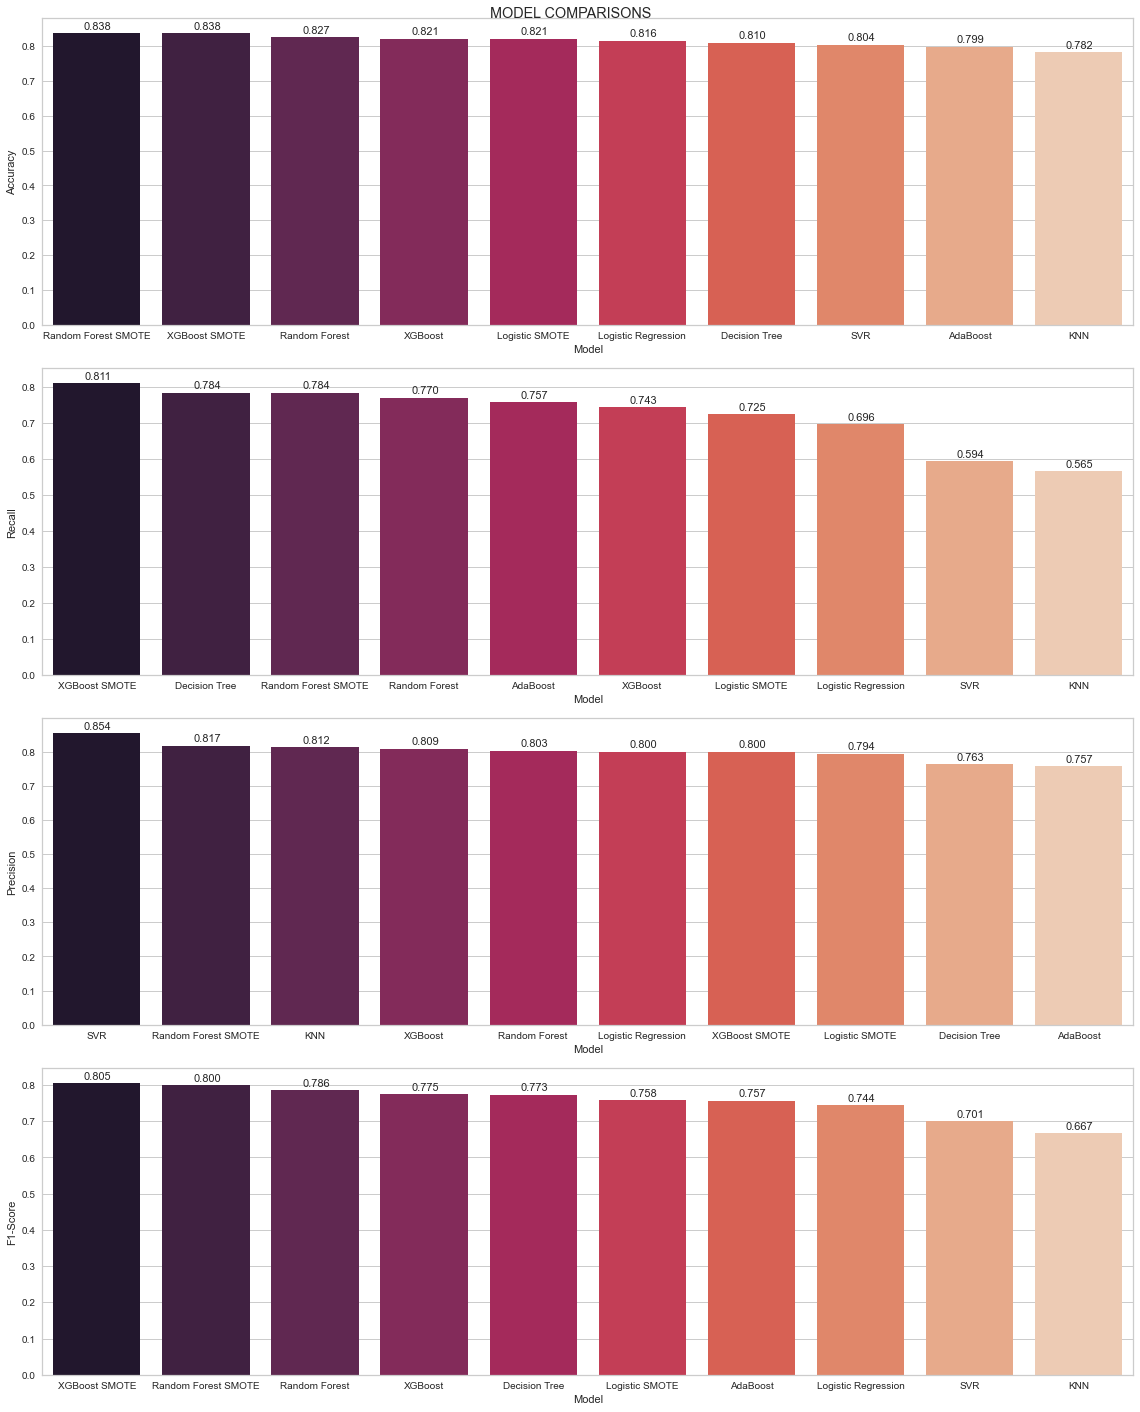

In [270]:
fig, ax = plt.subplots(4,1, figsize=(16,20))

def labels(ax, i):
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=11)
                
sns.barplot(x='Model', y='Accuracy', data=compare.sort_values('Accuracy', ascending=False), palette='rocket', ax = ax[0]), labels(ax,0)
sns.barplot(x='Model', y='Recall', data=compare.sort_values('Recall', ascending=False), palette='rocket', ax = ax[1]), labels(ax,1)
sns.barplot(x='Model', y='Precision', data=compare.sort_values('Precision', ascending=False), palette='rocket', ax = ax[2]), labels(ax,2)
sns.barplot(x='Model', y='F1-Score', data=compare.sort_values('F1-Score', ascending=False), palette='rocket', ax = ax[3]), labels(ax,3)

fig.suptitle('MODEL COMPARISONS')
fig.tight_layout(); 

### New Predictions

In [221]:
final_rf_re_model = RandomForestClassifier(random_state=42, max_depth=10, max_features=4, min_samples_leaf=1, 
                                     min_samples_split=5, n_estimators=64, class_weight='balanced')

In [222]:
final_rf_re_model.fit(X2, y2)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=4,
                       min_samples_split=5, n_estimators=64, random_state=42)

In [223]:
final_pred_rf_re = final_rf_re_model.predict(X_enc)

In [224]:
final_xgb_re_model = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=4, max_features=None,
                      n_estimators=200, subsample=0.8, random_state=42)

In [225]:
final_xgb_re_model.fit(X2, y2)

[10:55:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              max_features=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [226]:
final_pred_re_xgb = final_xgb_re_model.predict(X_enc)

In [227]:
rf_re_df = pd.DataFrame(final_pred_rf_re, columns=['Random Forest SMOTE'])

In [228]:
xgb_re_df = pd.DataFrame(final_pred_re_xgb, columns=['XGBoost SMOTE'])

In [229]:
submission_re = pd.DataFrame(final_pred_rf_re, columns=['Survived'])

In [230]:
submit_re = pd.concat([test_data['PassengerId'], submission_re], axis=1)

In [231]:
submission_xgb = pd.DataFrame(final_pred_re_xgb, columns=['Survived'])

In [232]:
submit_xgb = pd.concat([test_data['PassengerId'], submission_xgb], axis=1)

In [233]:
# submit_re.to_csv('submission_re.csv', index=False)

In [234]:
# submit_xgb.to_csv('submission_xgb.csv', index=False)